In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_avg_reward(df, num_avg = 50):
    avg_rewards = [df['reward'].values[0]]
    episodes = [df['episode'].values[0]]

    for i in range(int(len(df)/num_avg)):
        episodes.append(df[(i+1)*num_avg-1:(i+1)*num_avg]['episode'].values[0]+1)
        avg_rewards.append(df[i*num_avg:(i+1)*num_avg].mean()[1])

    return pd.DataFrame({'reward':avg_rewards, 'episode': episodes})

In [3]:
def get_axes(num_graph, n_rows):
    assert num_graph % n_rows == 0, f"Invalid n_rows : {num_graph} should be divisible by n_rows"
    fig, axes = plt.subplots(nrows=n_rows, ncols=int(num_graph/n_rows),
                           figsize = (5*(num_graph/n_rows),5*n_rows), facecolor='white')
    if axes.shape[0] == num_graph:
        return axes
    else:
        axes_list = []
        for x in range(len(axes)):
            for y in range(len(axes[0])):
                axes_list.append(axes[x][y])
        return axes_list


In [4]:
def draw_plot(path_list, num=50, n_rows=1, file_name='default.png', title=False):
    if title:
        assert len(title) == len(path_list), f"title length should be {len(title)}"
    axes = get_axes(num_graph=len(path_list), n_rows=n_rows)
    for idx in range(len(path_list)):
        df = pd.read_csv(path_list[idx])
        draw_df = get_avg_reward(df, num)
        axes[idx].set_xlabel('Training Episodes')
        axes[idx].set_ylabel('Average Reward per Episode')
        if not title:
            axes[idx].set_title(path_list[idx].split('/')[-1].split('.')[0])
        else:
            axes[idx].set_title(title[idx])
        axes[idx].plot(draw_df['episode'],draw_df['reward'],color="green")
    plt.savefig(file_name)
    plt.show()

In [5]:
def draw_one_plot(path_list, name_list, title, num=50, n_rows=1, file_name='default.png'):
    assert len(path_list) == len(name_list), f"Invalid input: path_list and name_list length should be same.\n len(path_list) = {len(path_list)}, len(name_list) = {len(name_list)}"
    plt.figure(facecolor='white')
    plt.title(title)
    plt.xlabel("Training Episodes")
    plt.ylabel("Average Reward per Episode")
    for idx in range(len(path_list)):
        df = pd.read_csv(path_list[idx])
        draw_df = get_avg_reward(df, num)
        plt.plot(draw_df['episode'],draw_df['reward'],label=name_list[idx])
    plt.legend()
    plt.savefig(file_name)
    plt.show()

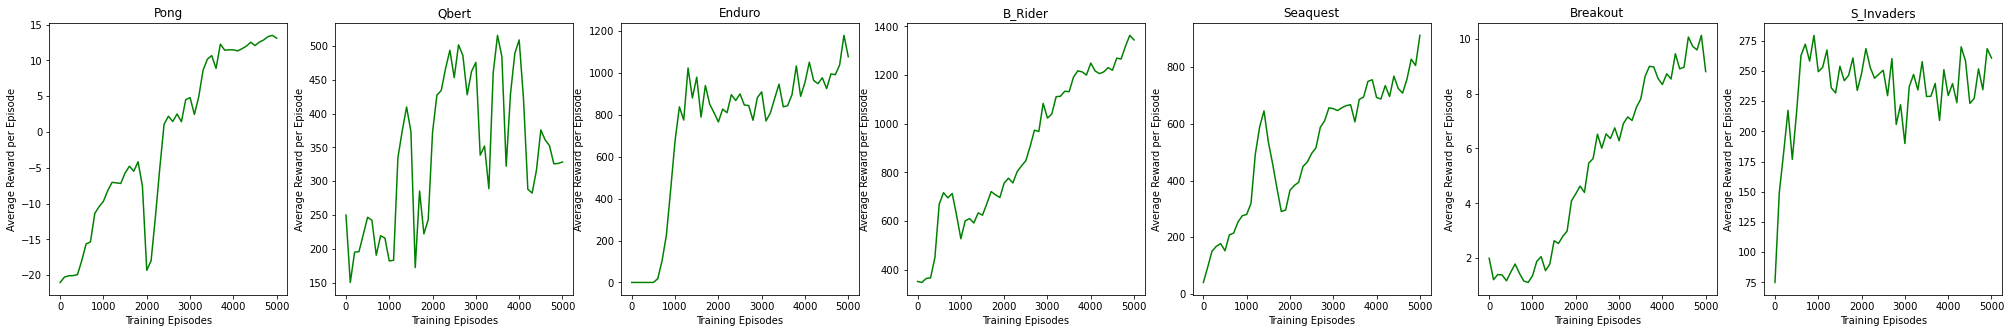

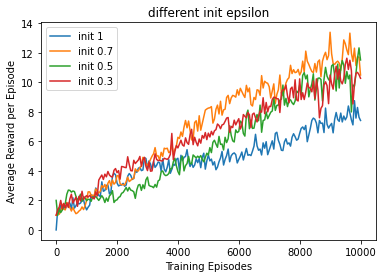

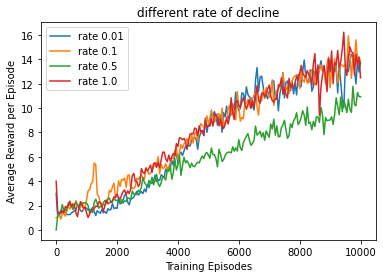

In [6]:
first_exp_list = ['./results/Pong.csv', 'results/Qbert.csv', 'results/Enduro.csv', 'results/B_Rider.csv',
                  'results/Seaquest.csv', 'results/Breakout.csv', 'results/S_Invaders.csv']
second_exp_list = ['./results/Breakout_dif_init_1.csv', './results/Breakout_dif_init_2.csv',
                   './results/Breakout_dif_init_3.csv', './results/Breakout_dif_init_4.csv']
second_name_list = ['init 1','init 0.7','init 0.5','init 0.3']

third_exp_list = ['./results/Breakout_dif_grad_1.csv', './results/Breakout_dif_grad_2.csv',
                  './results/Breakout_dif_grad_3.csv', './results/Breakout_dif_grad_4.csv']
third_name_list = ['rate 0.01','rate 0.1','rate 0.5','rate 1.0']
draw_plot(first_exp_list,100,1, file_name='experiment_1')
draw_one_plot(second_exp_list,second_name_list,'different init epsilon',
              file_name='experiment_2')
draw_one_plot(third_exp_list,third_name_list,'different rate of decline',
              file_name='experiment_3')